### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline


In [3]:
# Accessing EnvFile for path

%run EnvFile.ipynb


Stored 'path' (str)


In [4]:
# Import ".csv" file for the SaaS sales dataset.

df = pd.read_csv(os.path.join(path, '01 Data', 'SaaS-Sales.csv'))


In [5]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [6]:
df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/09/22,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/09/22,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/21,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/21,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [7]:
df.shape


(9994, 19)

The data is already cleaned.

### 2. Data prep for regression analysis 

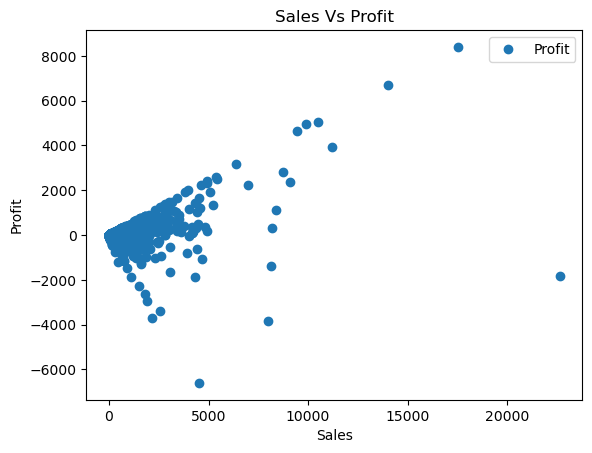

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales Vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()


In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)


In [10]:
X


array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [11]:
y


array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### 3. Regression analysis

In [13]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.


In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


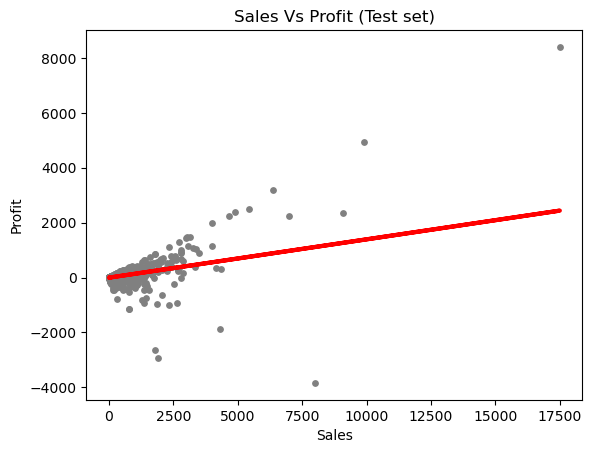

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales Vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()


In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 


In [18]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.13956559]]
Mean squared error:  51349.12515753704
R2 score:  0.30776582766799


#### The slope is positive indicating that as Sales increase, Profit increases. 
#### The MSE is quite large. Regression may not be the best model to represent this data and can’t accurately predict the influence of Sales on profit.
#### The R2 score indicates that the model isn’t that great of a fit either.

In [19]:
y_predicted


array([[-1.75662971e+00],
       [-1.85432563e+00],
       [-1.03056598e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136527e+00],
       [ 2.24946099e+00]])

In [20]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


##### Compare how the regression fits the training set

In [21]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!


In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.13956559]]
Mean squared error:  39304.148923188775
R2 score:  0.15617731199139895


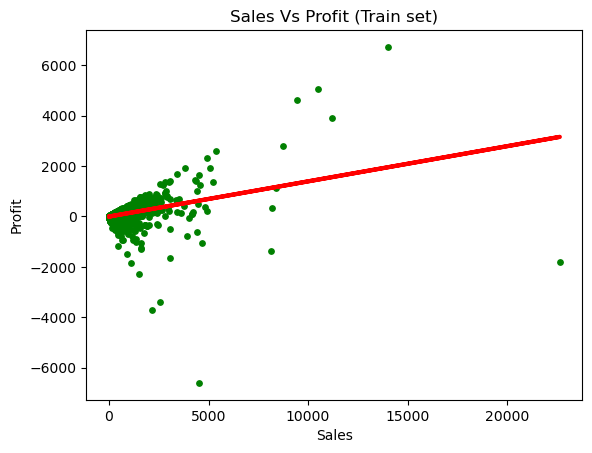

In [24]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales Vs Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()


## Second hypothesis

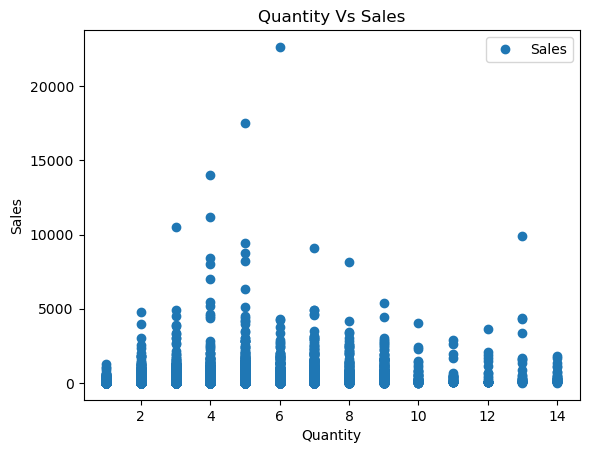

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Quantity', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Quantity Vs Sales')  
plt.xlabel('Quantity')  
plt.ylabel('Sales')  
plt.show()


In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Quantity'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)


In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.


In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)


LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


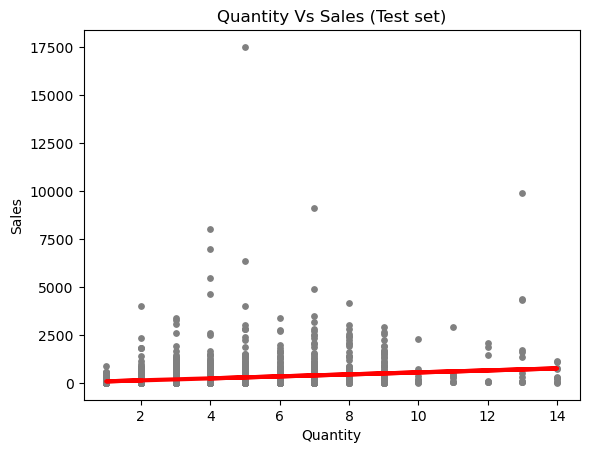

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Quantity Vs Sales (Test set)')
plot_test.xlabel('Quantity')
plot_test.ylabel('Sales')
plot_test.show()


In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[51.74971137]]
Mean squared error:  401242.300609247
R2 score:  0.05159973399131046


#### The slope is positive indicating that as Quantity increase, Sales increases. 
#### The MSE is quite large. Regression may not be the best model to represent this data and can’t accurately predict the influence of Sales on profit.
#### The R2 score indicates that the model isn’t that great of a fit either.

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.3600,133.964264
1,22.6600,133.964264
2,35.2080,82.214553
3,283.9200,289.213398
4,19.8240,340.963110
5,39.9200,133.964264
6,68.4800,133.964264
7,1591.0200,340.963110
8,156.3728,133.964264
9,3499.9300,392.712821


##### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!


In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[51.74971137]]
Mean squared error:  360672.56083376845
R2 score:  0.034250091935880356


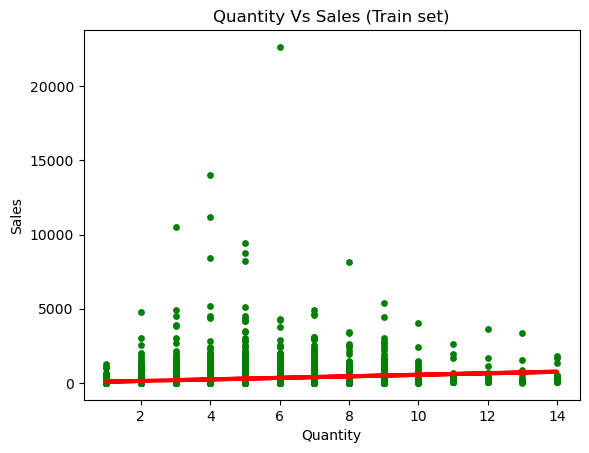

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Quantity Vs Sales (Train set)')
plot_test.xlabel('Quantity')
plot_test.ylabel('Sales')
plot_test.show()
